## Feature_engineering1

* run fold
* different fillna method
* Ordinal Encoding
* adding_similar_features
* model_feature_importance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train (1).csv')
print(train.shape)
#train.head().T

test = pd.read_csv('test (1).csv')
print(test.shape)
#test.head().T

cats_train = train.select_dtypes(include='object').columns
cats_test = test.select_dtypes(include='object').columns
print('No of train cat_cols : ',len(cats_train))
print('No of test cat_cols : ',len(cats_test))

(1460, 81)
(1459, 80)
No of train cat_cols :  43
No of test cat_cols :  43


In [5]:
target='SalePrice'

In [8]:
test.loc[:,target] = 'test_col'
merged = pd.concat([train,test],axis=0)
print('train = ',train_copy.shape)
print('test = ',test.shape)
print('merged  = ',merged.shape)

train =  (1460, 81)
test =  (1459, 81)
merged  =  (2919, 81)


In [86]:
mg= merged.copy()
mcat_col = merged.select_dtypes(include='object').columns
for col in mcat_col:
# do not encode the numerical columns
    merged.loc[:, col] = merged[col].astype(str).fillna("NONE")

In [7]:
train_copy=train.copy()

In [9]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
def check_subset(train,test,column_list):
    false_list=[]
    for col in column_list:
        boolean = set(test[col].unique()).issubset(set(train[col].unique()))
        if boolean== False:
            #print("column : ",col)
            #print("test is a subset: ",boolean)
            #print("====================")
            false_list.append(col)
    return false_list
false_subset = check_subset(train,test,cats_train)
false_subset

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'KitchenQual',
 'Functional',
 'SaleType']

In [7]:
for col in false_subset:
    print('train',train[col].unique(),' --- ','test',test[col].unique())
    print('size_train = ',train[col].nunique(),' --- ','size_test = ',test[col].nunique())
    print("======================")

train ['RL' 'RM' 'C (all)' 'FV' 'RH']  ---  test ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]
size_train =  5  ---  size_test =  5
train ['AllPub' 'NoSeWa']  ---  test ['AllPub' nan]
size_train =  2  ---  size_test =  1
train ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']  ---  test ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' nan 'CBlock']
size_train =  15  ---  size_test =  13
train ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']  ---  test ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'Brk Cmn' 'CmentBd'
 'ImStucc' 'Wd Shng' 'AsbShng' 'Stucco' 'CBlock' 'BrkFace' 'AsphShn' nan
 'Stone']
size_train =  16  ---  size_test =  15
train ['Gd' 'TA' 'Ex' 'Fa']  ---  test ['TA' 'Gd' 'Ex' 'Fa' nan]
size_train =  4

In [9]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
train_no_id = train.drop('Id',axis=1) ; target = 'SalePrice'

In [12]:
from sklearn import ensemble
RF_base = ensemble.RandomForestRegressor(n_estimators=200)

In [24]:
train.SalePrice.mean()

180921.19589041095

In [27]:
def run(df,target,model,fold,save_fold_csv=False):
    from sklearn import model_selection
    from sklearn import metrics ; from sklearn import preprocessing ; from sklearn import impute
    # we create a new column called kfold and fill it with -1
    df["kfold"] = -1
    # the next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop=True)
    # fetch labels
    y = df[target].values
    # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)

    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)): # f= fold, t_=train_index ,v_= valid_index
        df.loc[v_, 'kfold'] = f

    #save the new csv with kfold column
    #if save_fold_csv == True:
        #df.to_csv("../input/cat_train_folds.csv", index=False)
    # load the full training data with folds
    # df = pd.read_csv("../input/adult_folds.csv")

    features = [f for f in df.columns if f not in ("kfold",target)]
    num_col =  [f for f in df.select_dtypes(exclude='object').columns if f not in ("kfold",target)]
    #1. fill all NaN values with NONE
    cat_col = df.select_dtypes(include='object').columns
    for col in cat_col:
    # do not encode the numerical columns
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
        
    #3. fill all NaN values with median
    for col in num_col: 
        imputer = df[col].median()
        df.loc[:, col] = df[col].fillna(imputer)

    #2. label encode the features
    for col in cat_col: 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(df[col])
        df.loc[:, col] = lbl.transform(df[col])
    # get training data using folds
    df_train = df[df.kfold != fold].reset_index(drop=True)
    # get validation data using folds
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    # get training data
    x_train = df_train[features].values
    # get validation data
    x_valid = df_valid[features].values
    # fit model on training data (ohe)
    model.fit(x_train, df_train[target].values)
    # predict on validation data
    # we may need the probability values as we are calculating AUC
    # we will use the probability of 1s
    #valid_preds = model.predict_proba(x_valid)[:, 1]
    valid_prediction = model.predict(x_valid)
    # get roc auc score
    #auc = metrics.roc_auc_score(df_valid[target].values, valid_preds)
    #f1 = metrics.f1_score(df_valid[target].values, valid_prediction)
    MSE = metrics.mean_squared_error(df_valid[target].values, valid_prediction) ; RMSE = np.sqrt(MSE)
    # print auc,f1
    #print(f"Fold = {fold}, AUC = {auc}, F1 = {f1}")
    print(f"Fold = {fold}, RMSE = {RMSE}")
    return(RMSE)

In [ ]:
def cross_val_class(X_train,y_train,classifier_list,classifier_name,scoring):
    """
    run quick cross validation
    params :
            :- classifier_list = array of models 
                    e.g >>> model = [AdaBoostClassifier(),RandomForestClassifier(n_estimators=50,max_leaf_nodes=25)]
            
            :- classifier_name = array (description of the model)
                    e.g >>> model_name= ['AdaBoostClassifier()','RandomForestClassifier','xg','et','lr','nb_m','dr']
                    
            Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

    """
    from sklearn.model_selection import cross_val_score,StratifiedShuffleSplit
    #kf=StratifiedShuffleSplit()
    mod=[]
    cv_score=[]
    for m in classifier_list:
        cv_score.append(cross_val_score(m,X_train,y_train,scoring=scoring,cv=5))
        #score = np.sqrt(score)
    cross_val = pd.DataFrame(cv_score,index=classifier_name)
    return cross_val

In [32]:
#
from sklearn.ensemble import RandomForestRegressor ,ExtraTreesRegressor
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.metrics import  mean_absolute_error,r2_score,mean_squared_error
las_R = Lasso()
L_R = LinearRegression()
rf = RandomForestRegressor(n_estimators=200)
et= ExtraTreesRegressor(n_estimators=200)
from sklearn.tree import DecisionTreeRegressor
D_R = DecisionTreeRegressor()
# 
#from sklearn.metrics import SCORERS
#SCORERS.keys()

classifier_list= [rf,et,L_R,las_R,D_R]
classifier_name =['rf','et','L_R','las_R','D_R']
scoring ='neg_root_mean_squared_error'

In [17]:
np.arange(5)

array([0, 1, 2, 3, 4])

## fill na as NONE , median,used all features

In [ ]:
from xgboost import XGBRegressor
from adaboost 

In [30]:
for i in np.arange(5):
    RMSE_arr=[]
    score= run(df=train_no_id,target=target,model=RF_base,fold=i,save_fold_csv=False)  ; RMSE_arr.append(score)
print('mean_score = ', np.mean(RMSE_arr))

Fold = 0, RMSE = 32985.25656604154
Fold = 1, RMSE = 24712.483132533533
Fold = 2, RMSE = 35803.55589977414
Fold = 3, RMSE = 27702.784918636917
Fold = 4, RMSE = 23519.62374354353
mean_score =  23519.62374354353


In [83]:
for model in classifier_list:
    print('Model : ',model)
    for i in np.arange(5):
        RMSE_arr=[]
        score= run(df=train_no_id,target=target,model=model,fold=i,save_fold_csv=False)  ; RMSE_arr.append(score)
    print('')
    print('___mean_score___ = ', np.mean(RMSE_arr))
    print('===============================================')

Model :  RandomForestRegressor(n_estimators=200)
Fold = 0, RMSE = 46841.872464595705
Fold = 1, RMSE = 31403.802466240748
Fold = 2, RMSE = 30166.60908255507
Fold = 3, RMSE = 33636.59006596043
Fold = 4, RMSE = 35470.635233042456

___mean_score___ =  35470.635233042456
Model :  ExtraTreesRegressor(n_estimators=200)
Fold = 0, RMSE = 25900.10084049816
Fold = 1, RMSE = 28749.76179346317
Fold = 2, RMSE = 25526.253271048132
Fold = 3, RMSE = 25380.12431930989
Fold = 4, RMSE = 29436.27211840762

___mean_score___ =  29436.27211840762
Model :  LinearRegression()
Fold = 0, RMSE = 27119.73289037785
Fold = 1, RMSE = 37431.802341044335
Fold = 2, RMSE = 32561.659280944812
Fold = 3, RMSE = 28311.623465510853
Fold = 4, RMSE = 31382.908090283392

___mean_score___ =  31382.908090283392
Model :  Lasso()
Fold = 0, RMSE = 45923.33302372423
Fold = 1, RMSE = 36329.12868368334
Fold = 2, RMSE = 42636.72436398856
Fold = 3, RMSE = 29797.25426427122
Fold = 4, RMSE = 29849.13132948312

___mean_score___ =  29849.13132

## fill na as NONE , median,used on num features

In [34]:
num_cols  = train_no_id.select_dtypes(exclude='object').columns
exp1 = train_no_id[num_cols]
for model in classifier_list:
    print('Model : ',model)
    for i in np.arange(5):
        RMSE_arr=[]
        score= run(df=train_no_id,target=target,model=model,fold=i,save_fold_csv=False)  ; RMSE_arr.append(score)
    print('')
    print('___mean_score___ = ', np.mean(RMSE_arr))
    print('===============================================')

Model :  RandomForestRegressor(n_estimators=200)
Fold = 0, RMSE = 27398.54982056093
Fold = 1, RMSE = 33611.84790282795
Fold = 2, RMSE = 33496.48581413371
Fold = 3, RMSE = 30652.68130747701
Fold = 4, RMSE = 30775.546347519004

___mean_score___ =  30775.546347519004
Model :  ExtraTreesRegressor(n_estimators=200)
Fold = 0, RMSE = 22266.67173459629
Fold = 1, RMSE = 34208.9335177204
Fold = 2, RMSE = 29596.06943796455
Fold = 3, RMSE = 32734.153473364164
Fold = 4, RMSE = 27056.225451576247

___mean_score___ =  27056.225451576247
Model :  LinearRegression()
Fold = 0, RMSE = 27371.643180539937
Fold = 1, RMSE = 46758.27349184455
Fold = 2, RMSE = 30706.698857364474
Fold = 3, RMSE = 29141.347112445535
Fold = 4, RMSE = 27730.050010614566

___mean_score___ =  27730.050010614566
Model :  Lasso()
Fold = 0, RMSE = 37461.502301176435
Fold = 1, RMSE = 28130.54452988351
Fold = 2, RMSE = 47637.90219455077
Fold = 3, RMSE = 28254.07770124547
Fold = 4, RMSE = 34448.36410717157

___mean_score___ =  34448.36410

In [38]:
#1. fill all NaN values with NONE
cat_col = train.select_dtypes(include='object').columns
for col in cat_col:
# do not encode the numerical columns
    train.loc[:, col] = train[col].astype(str).fillna("NONE")

In [42]:
'kfold' in num_cols

True

In [56]:
train.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'nan', 'LwQ'], dtype=object)

In [54]:
train.BsmtCond.value_counts()

TA     1311
Gd       65
Fa       45
nan      37
Po        2
Name: BsmtCond, dtype: int64

In [48]:
rank = [7,5,10,3]
ExterQual_dict ={}
for i,j in zip(train.ExterQual.unique(),rank):
    ExterQual_dict[i]=j
#ExterQual_dict
train['ExterQual'] =  train['ExterQual'].map(ExterQual_dict)
train['ExterQual'].value_counts()

5     906
7     488
10     52
3      14
Name: ExterQual, dtype: int64

In [13]:
def Ordinal_Encoding_Rank(train,column_list,rank_list):
    for column, rank in zip(column_list,rank_list):
        column_dict ={}
        for i,j in zip(train[column].unique(),rank):
            column_dict[i]=j
        train[column] =  train[column].map(column_dict)
    return train

In [58]:
cat_col

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [19]:
col_list_rank= [ 'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual','GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence'
      ,'Functional']

In [20]:
for col in col_list_rank:
    print("__________ ",col," ______________")
    print(train[col].unique())
    print('======================================================================')

__________  ExterQual  ______________
['Gd' 'TA' 'Ex' 'Fa']
__________  ExterCond  ______________
['TA' 'Gd' 'Fa' 'Po' 'Ex']
__________  BsmtQual  ______________
['Gd' 'TA' 'Ex' nan 'Fa']
__________  BsmtCond  ______________
['TA' 'Gd' nan 'Fa' 'Po']
__________  BsmtExposure  ______________
['No' 'Gd' 'Mn' 'Av' nan]
__________  BsmtFinType1  ______________
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
__________  BsmtFinType2  ______________
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
__________  HeatingQC  ______________
['Ex' 'Gd' 'TA' 'Fa' 'Po']
__________  CentralAir  ______________
['Y' 'N']
__________  Electrical  ______________
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
__________  KitchenQual  ______________
['Gd' 'TA' 'Ex' 'Fa']
__________  GarageFinish  ______________
['RFn' 'Unf' 'Fin' nan]
__________  GarageQual  ______________
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
__________  GarageCond  ______________
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
__________  PavedDrive  ______________
['Y' 'N' 'P']

In [73]:
#col_list_rank = ['ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1']
ranks=[[7,5,10,3],
       [5,7,3,0,10] ,
       [7,5,10,0,3],
       [5,7,0,3,1],
       [1,4,2,3,0],
       [10,5,2,5.5,3,0,1],
       [2,3,0,5,5.5,1,10],
       [10,7,5,3,0],
       [1,0],
       [5,4,3,2,2.5,0],
       [7,5,10,3],
       [3,2,5,0],
       [5,3,0,7,1,10],
       [5,3,0,7,1,10],
       [3,2,1],
       [0,5,2,3],
       [0,3,5,5,3],
       [10,8,3,6,5,2,0]
]

In [74]:
exp1 = Ordinal_Encoding_Rank(train,column_list=col_list_rank,rank_list=ranks)

In [82]:
exp1.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'kfold'],
      dtype='object')

## experiment 2 ..only ranked ft and num

In [79]:
exp1 = exp1.drop('Id',axis=1)

In [81]:
num_cols  = exp1.select_dtypes(exclude='object').columns
exp2 = exp1[num_cols]
for model in classifier_list:
    print('Model : ',model)
    for i in np.arange(5):
        RMSE_arr=[]
        score= run(df=train_no_id,target=target,model=model,fold=i,save_fold_csv=False)  ; RMSE_arr.append(score)
    print('')
    print('___mean_score___ = ', np.mean(RMSE_arr))
    print('===============================================')

Model :  RandomForestRegressor(n_estimators=200)
Fold = 0, RMSE = 29179.48191800038
Fold = 1, RMSE = 31594.502172508594
Fold = 2, RMSE = 25397.57463270797
Fold = 3, RMSE = 27424.683189615585
Fold = 4, RMSE = 26589.148524185075

___mean_score___ =  26589.148524185075
Model :  ExtraTreesRegressor(n_estimators=200)
Fold = 0, RMSE = 27131.542279753136
Fold = 1, RMSE = 28304.336206301025
Fold = 2, RMSE = 26970.538026626436
Fold = 3, RMSE = 33051.690990856136
Fold = 4, RMSE = 28308.005503578457

___mean_score___ =  28308.005503578457
Model :  LinearRegression()
Fold = 0, RMSE = 25672.997475677024
Fold = 1, RMSE = 45789.28299402038
Fold = 2, RMSE = 34969.06699012969
Fold = 3, RMSE = 28920.719372497682
Fold = 4, RMSE = 49419.98832926697

___mean_score___ =  49419.98832926697
Model :  Lasso()
Fold = 0, RMSE = 31410.916652137956
Fold = 1, RMSE = 25490.448848227596
Fold = 2, RMSE = 33851.25793319469
Fold = 3, RMSE = 34271.788661499784
Fold = 4, RMSE = 33563.04884725937

___mean_score___ =  33563.

In [84]:
# kinda  better

#### merged_data

In [14]:
test.loc[:,target] = 'test_col'
merged = pd.concat([train_copy,test],axis=0)
print('train = ',train_copy.shape)
print('test = ',test.shape)
print('merged  = ',merged.shape)

train =  (1460, 81)
test =  (1459, 81)
merged  =  (2919, 81)


In [135]:
train_copy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
mg= merged.copy()
def FillNan(train):
    cat_col = train.select_dtypes(include='object').columns
    for col in cat_col:
    # do not encode the numerical columns
        train.loc[:, col] = train[col].astype(str).fillna("NONE")
    return train
merged_fill = FillNan(merged)

In [16]:
merged_fill[(train.select_dtypes(include='object').columns)].isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [87]:
false_subset in col_list_rank

False

In [138]:
for col in col_list_rank:
    print("__________ ",col," ______________")
    print(merged_fill[col].unique())
    print('======================================================================')

__________  ExterQual  ______________
['Gd' 'TA' 'Ex' 'Fa']
__________  ExterCond  ______________
['TA' 'Gd' 'Fa' 'Po' 'Ex']
__________  BsmtQual  ______________
['Gd' 'TA' 'Ex' 'nan' 'Fa']
__________  BsmtCond  ______________
['TA' 'Gd' 'nan' 'Fa' 'Po']
__________  BsmtExposure  ______________
['No' 'Gd' 'Mn' 'Av' 'nan']
__________  BsmtFinType1  ______________
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'nan' 'LwQ']
__________  BsmtFinType2  ______________
['Unf' 'BLQ' 'nan' 'ALQ' 'Rec' 'LwQ' 'GLQ']
__________  HeatingQC  ______________
['Ex' 'Gd' 'TA' 'Fa' 'Po']
__________  CentralAir  ______________
['Y' 'N']
__________  Electrical  ______________
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' 'nan']
__________  KitchenQual  ______________
['Gd' 'TA' 'Ex' 'Fa' 'nan']
__________  GarageFinish  ______________
['RFn' 'Unf' 'Fin' 'nan']
__________  GarageQual  ______________
['TA' 'Fa' 'Gd' 'nan' 'Ex' 'Po']
__________  GarageCond  ______________
['TA' 'Fa' 'nan' 'Gd' 'Po' 'Ex']
__________  PavedDrive  ____

In [17]:
ranks2 =[[7, 5, 10, 3,],
 [5, 7, 3, 0, 10,],
 [7, 5, 10, 0, 3,],
 [5, 7, 0, 3, 1,],
 [1, 4, 2, 3, 0],
 [10, 5, 2, 5.5, 3, 0, 1,],
 [2, 3, 0, 5, 5.5, 1, 10,],
 [10, 7, 5, 3, 0],
 [1, 0],
 [5, 4, 3, 2, 2.5, 0],
 [7, 5, 10, 3,0],
 [3, 2, 5, 0],
 [5, 3, 7, 0, 1, 10],
 [5, 3, 0, 7, 1, 10],
 [3, 2, 1],
 [0, 5, 2, 3],
 [0, 3, 5, 5, 3],
 [10, 8, 3, 6, 5, 2, 1,0]]

In [21]:
mf = Ordinal_Encoding_Rank(train=merged_fill,column_list=col_list_rank,rank_list=ranks2)
mf.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,nan,Reg,Lvl,AllPub,...,0,0,0,nan,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,nan,Reg,Lvl,AllPub,...,0,0,0,nan,0,5,2007,WD,Normal,181500


In [23]:
merged[(train.select_dtypes(include='object').columns)].isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [22]:
mf[(train.select_dtypes(include='object').columns)].isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [160]:
Porch_Area = ['WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

In [ ]:
new_feat = ['Max_Porch_Area']

In [164]:
def adding_similar_features(data,new_col,features):
    data['total_'+new_col] = data[features].sum(axis=1)
    return data
mf_porch =adding_similar_features(data=mf,new_col='Porch',features=Porch_Area)

In [165]:
mf_porch['total_Porch']

0        61
1       298
2        42
3       307
4       276
       ... 
1454      0
1455     24
1456    474
1457    112
1458    238
Name: total_Porch, Length: 2919, dtype: int64

In [166]:
et
base_et 

ExtraTreesRegressor(n_estimators=200)

In [167]:
def model_feature_importance(model,X_train_df,n_features):
    feature_importance_df = pd.DataFrame(model.feature_importances_,columns=['importance'])
    feature_importance_df['feature'] = X_train_df.columns
    new_feat= feature_importance_df.sort_values(by=['importance'],ascending= False).head(n_features)['feature'].to_list()
    plt.figure(figsize=(20,14))
    sns.barplot(x='importance',y='feature',data=feature_importance_df.sort_values(by=['importance'],ascending= False).head(n_features))
    plt.title('Model__Feature__Importance')
    plt.show()
    return new_feat

In [175]:
features=exp1.columns.drop(['kfold','SalePrice'])
features

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [183]:
train_df = mf_porch.loc[mf_porch.SalePrice!='test_col'].reset_index(drop=True)
#test_df = new_data.loc[new_data.Response =='test'].reset_index(drop=True)
num_col =  [f for f in train_df.select_dtypes(exclude='object').columns if f not in ("kfold",target,'Id','total_Max_Porch_Area','total_Porch')]

X3 = train_df[num_col]
y3 = train_df[target]

for col in num_col: 
        imputer = X3[col].median()
        X3.loc[:, col] = X3[col].fillna(imputer)



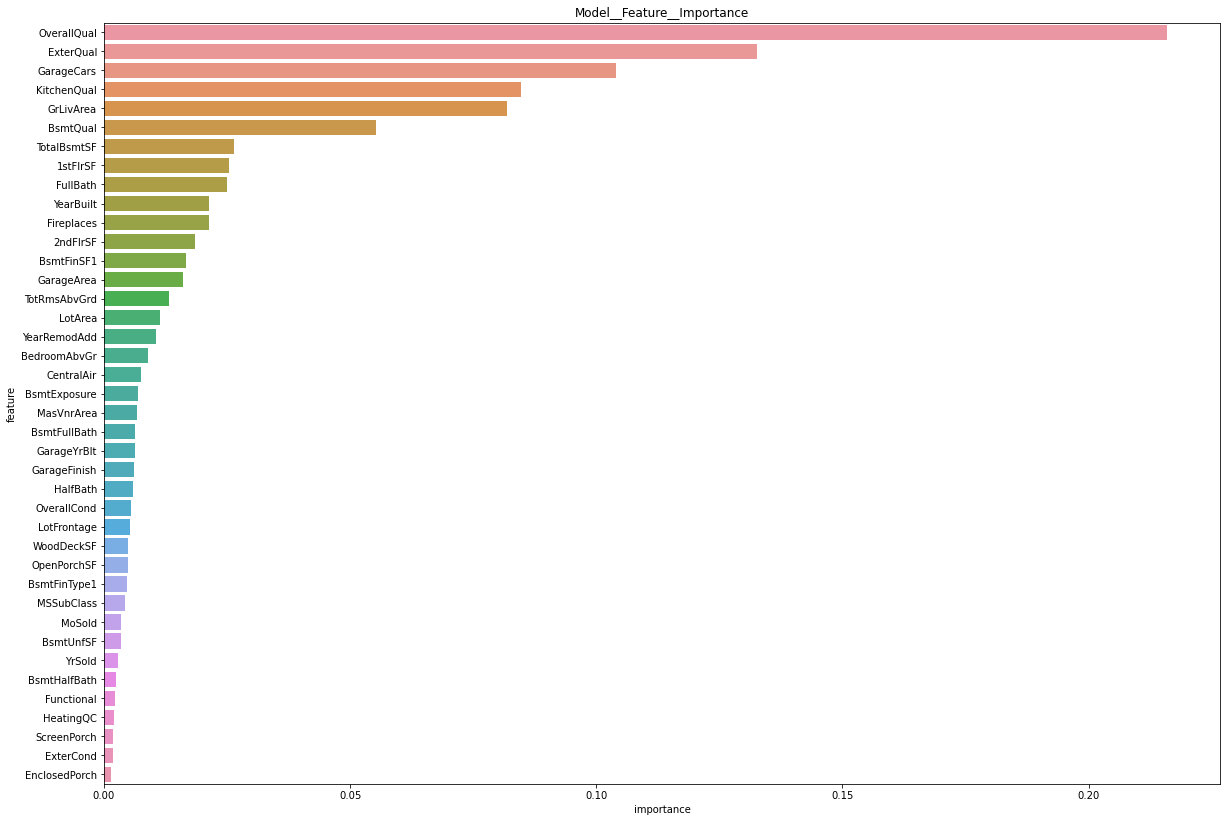

In [184]:
base_feat = model_feature_importance(model=et.fit(X3,y3),X_train_df=X3,n_features=40)

In [185]:
mf.to_csv('ordinal_done.csv',index=False)

In [187]:
mf.OverallQual.max()

2010

TypeError: unsupported operand type(s) for /: 'str' and 'int'

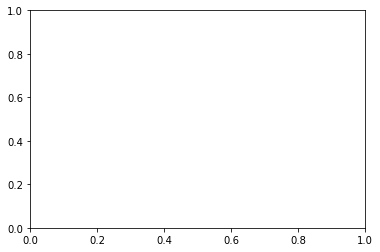

In [192]:
sns.boxplot(x='OverallQual',
    y='SalePrice',
    hue='CentralAir',data=train_df)